In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/AI_Dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
target = 'Outcome'
X = df.drop(columns=[target]).values
y = pd.get_dummies(df[target]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y # y 확인용


array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 2), (154, 2))

In [5]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(8,),activation='relu')) # feature 개수 확인, Dense는 feature값 이상
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='sigmoid')) # 수정된 부분(softmax -> sigmoid)
# 회귀는 Dense 1, 이진분류는 2, 다중분류는 3 이상)
# 이진분류는 sigmoid, 다중분류는 softmax

model.compile(optimizer = Adam(learning_rate = 0.01),loss = 'binary_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\gustj\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,062 (4.15 KB)

 Trainable params: 1,062 (4.15 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split = 0.1) # validation_data = (X_test, y_test) -> validation_split = 0.1
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6134 - loss: 2.4622 - val_accuracy: 0.5000 - val_loss: 1.1442
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5866 - loss: 1.0193 - val_accuracy: 0.5968 - val_loss: 0.7597
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6110 - loss: 0.9198 - val_accuracy: 0.6290 - val_loss: 0.7685
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6682 - loss: 0.7484 - val_accuracy: 0.6290 - val_loss: 0.6457
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6923 - loss: 0.6037 - val_accuracy: 0.7419 - val_loss: 0.6610
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7218 - loss: 0.6205 - val_accuracy: 0.6774 - val_loss: 0.7857
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6821 - loss: 0.6972 - val_accuracy: 0.6613 - val_loss: 0.6446
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6588 - loss: 0.6553 - val_accuracy: 0.6774 - v

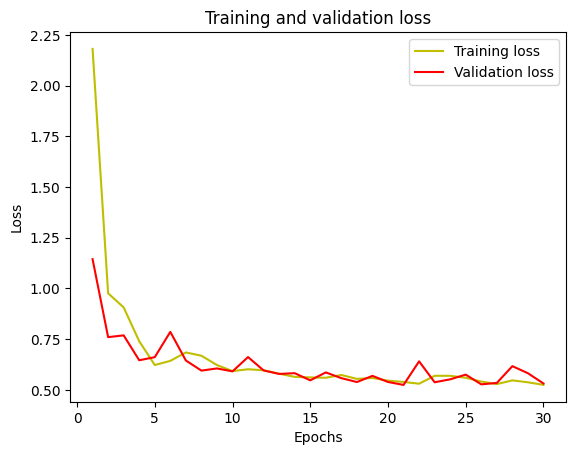

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


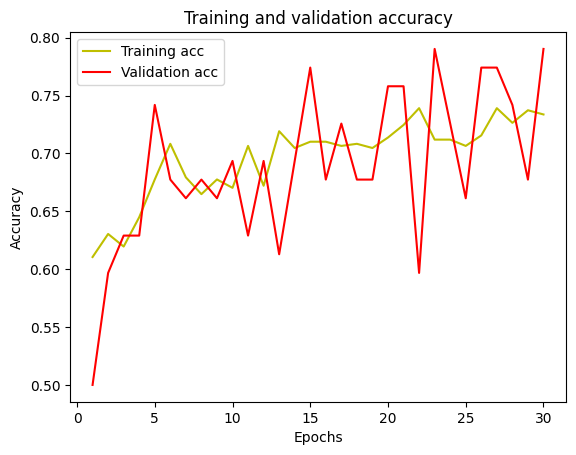

In [8]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       0.74      0.95      0.83        99
           1       0.81      0.40      0.54        55

    accuracy                           0.75       154
   macro avg       0.78      0.67      0.68       154
weighted avg       0.77      0.75      0.73       154

[[94  5]
 [33 22]]
